In [ ]:
# Engineered By Afan Shaikh Git: github.com/afan4

!pip install pandas matplotlib scikit-learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [2]:

# Load the dataset
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

# Encode categorical columns
df['DEALSIZE'] = LabelEncoder().fit_transform(df['DEALSIZE'])
df['STATUS'] = LabelEncoder().fit_transform(df['STATUS'])

# Select features for clustering
features = [
    'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP',
    'ORDERLINENUMBER', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
    'STATUS', 'DEALSIZE'
]
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


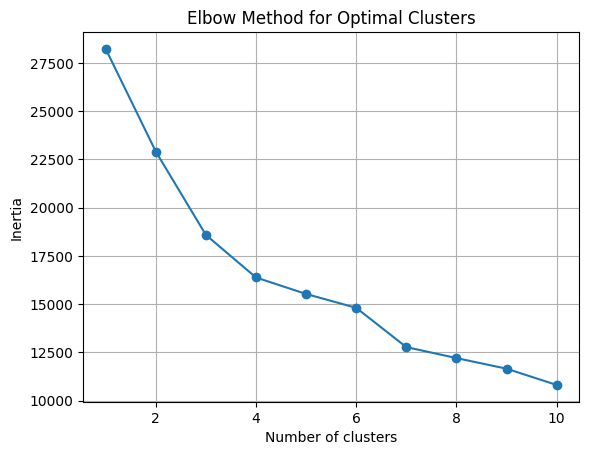

In [3]:

# Elbow method to find optimal number of clusters
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [4]:
# Fit KMeans with chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# View sample results
print(df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'Cluster']].head())


   QUANTITYORDERED  PRICEEACH    SALES  MSRP  Cluster
0               30      95.70  2871.00    95        2
1               34      81.35  2765.90    95        0
2               41      94.74  3884.34    95        1
3               45      83.26  3746.70    95        1
4               49     100.00  5205.27    95        1
